# Aula 6

- Polinómios interpoladores de Lagrange e Newton - (Diferenças divididas) 



## Polinómios de Lagrange



- 2 pontos de interpolação $(a,f(a)),\ (b,f(b))$: polinómio de grau 1.
$$P(x)=f(a)\frac{x-b}{a-b} +f(b)\frac{x-a}{b-a}$$




- 3 pontos de interpolação $(a,f(a)),\ (b,f(b)),\ (c,f(c))$: polinómio de grau 2.
$$P(x)=f(a)\frac{(x-b)(x-c)}{(a-b)(a-c)} +f(b)\frac{(x-a)(x-c)}{(b-a)(b-c)}+f(c)\frac{(x-a)(x-b)}{(c-a)(c-b)}$$



- $n+1$ pontos de interpolação $(x_i,f(x_i))\, (i=0,\dots, n)$
$$\displaystyle P_n(x)=\sum_{i=0}^{n}f(x_i)L_i(x)=\sum_{i=0}^{n}f(x_i)\prod_{\stackrel{j=0}{
    j\neq i}}^n\frac{(x-x_j)}{(x_i-x_j)}$$
onde $$L_i(x)=\prod_{\stackrel{j=0}{
    j\neq i}}^n\frac{(x-x_j)}{(x_i-x_j)}$$ são designados por  polinómios de Lagrange


### Uma possível  implementação (sem classes/objectos...) dos polinómios de Lagrange:

In [71]:
import numpy as np

def PLagrange(data_x,data_y):
    if (len(data_x)==len(data_y)): # testa a dimensão dos dados
        print('data=\n',np.array([data_x,data_y]))
        M=len(data_x) # dimensão dos dados indica o grau máximo do polinómio interpolador
        
        # Uma função pode devolver outra função!
        def LagrangeFunction(x):
            PolLagrange=0.0
            for i in range(0,M):
                Li=1.0
                for j in range(0,M):
                    if j==i:
                        continue
                    Li*=(x-data_x[j])/(data_x[i]-data_x[j]) #Funçoes Base
                PolLagrange+=Li*data_y[i] # Polinómio de Lagrange 
        
            return PolLagrange
        
        return LagrangeFunction





### Exercício: (Lagrange)

- Considere a tabela de pontos 
 $$
 \begin{array}{|c|c|c|c|c|}
 \hline
x & 0& 2 & 4 &5\\
\hline
y & 0 & 3 & -1 &3\\
\hline
\end{array}
$$

- Utilize o polinómio de Lagrange para aproximar o valor de $f(3.2)$ e $f(4.7)$

- Apresente graficamente o polinómio interpolador de grau $\leq 3$ que se coloca sobre os pontos da tabela.

In [80]:
x = np.array([0,2,4,5])
y = np.array([0,3,-1,3])

#PLagrange é uma função
P3=PLagrange(x,y)
points=np.array([3.2,4.7])
print(P3(points))

data=
 [[ 0  2  4  5]
 [ 0  3 -1  3]]
[-0.3264    1.053975]


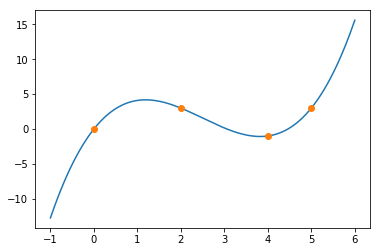

In [84]:
import matplotlib.pyplot as plt

xx=np.linspace(-1,6,200)
yy=P3(xx)
plt.plot(xx,yy,'-')
plt.plot(x,y,'o')
plt.show()
plt.clf()

## Fórmula interpoladora de Newton

### Diferenças Divididas


- Em Lagrange para aumentar o grau do polinómio é necessário refazer todo o cálculo.  Utilizando Newton basta acrescentar um termo.


### Definição:
Considere-se a notação: $f_i=f(x_i)$.
Diz-se diferença dividida de 1ª ordem a:
$$f[x_i,x_{i+1}]=\frac{f_{i+1}-f_i}{x_{i+1}-x_i}\qquad(=f[x_{i+1},x_i])$$
Diz-se diferença dividida de 2ª ordem a:
$$f[x_i,x_{i+1},x_{i+2}]=\frac{f[x_{i+1},x_{i+2}]-f[x_{i},x_{i+1}]}{x_{i+2}-x_i}$$
Diz-se diferença dividida de  ordem $n$ a:
$$f[x_i,x_{i+1},\cdots,x_{i+n}]=\frac{f[x_{i+1},\cdots,x_{i+n}]-f[x_{i}\cdots,x_{i+n-1}]}{x_{i+n}-x_i}$$


### Tabela para cálculo de Diferenças Divididas

Veja-se agora a uma  forma sistematizada  de calcular as diferenças divididas:

\begin{equation*}
\begin{array}{c|c|c|c|c|c}
x&f&f[x_i,x_j]&f[x_i,x_j,x_k]&f[x_i,x_j,x_k,x_l]&\cdots\\
\hline
x_0&f_0&&&&\\ 
&&f[x_0,x_1]&&&\\
x_1&f_1&&f[x_0,x_1,x_2]&&\\
&&f[x_1,x_2]&&f[x_0,x_1,x_2,x_3]&\\
x_2&f_2&&f[x_1,x_2,x_3]&&f[x_0,x_1,x_2,x_3,x_4]\\
&&f[x_2,x_3]&&f[x_1,x_2,x_3,x_4]&\\
x_3&f_3&&f[x_2,x_3,x_4]&&\\
&&f[x_3,x_4]&&&
\end{array}
\end{equation*} 

- Com $(n+1)$ pares de pontos $(x_i,f_i),\ i=0,\cdots,n$ chega-se à diferença dividida de ordem $n$.


### Forma alternativa para o cálculo das diferenças divididas. 
O cálculo da diferença dividida de ordem $k$ pode ser feito da forma seguinte:

\begin{align*}
f[x_0,x_1,\cdots,x_n]=&\frac{f(x_0)}{(x_0-x_1)(x_0-x_2)\cdots(x_0-x_n)}+\\
&+\frac{f(x_1)}{(x_1-x_0)(x_1-x_2)\cdots(x_1-x_n)}+\cdots+\\
&+\frac{f(x_n)}{(x_n-x_0)(x_n-x_1)\cdots(x_n-x_{n-1})}
\end{align*}

ou de outra forma 
\begin{align*}
f[x_0,x_1,\cdots,x_n]=\sum_{k=0}^n \frac{f(x_k)}{(x_k-x_0)(x_k-x_1)\cdots(x_k-x_{k-1})(x_k-x_{k+1})\cdots(x_k\cdots x_n)}
\end{align*}





Como corolário saíem os resultados seguintes:

- Têm-se as seguintes igualdades:
  $$f[x_0,x_1\cdots,x_k]=f[x_{j_0},x_{j_1},\cdots,x_{j_k}]$$ onde $(j_0,\cdots,j_k)$ é uma permutação dos inteiros
 $(0,1,\cdots,k)$. 
 
 
 - Por outro lado tem-se:
 $$f[x_0,\cdots,x_k]=\frac{f[x_0,\cdots,x_{i-1},x_{i+1},\cdots,x_k]-f[x_0,\cdots,x_{j-1},x_{j+1},\cdots,x_k]}{x_j-
 x_i}$$ com $i\neq j$.



### Construção do polinómio  $P_n(x)$ que interpola $f(x)$ em $x_0,\cdots, x_n$.

Considere-se $f(x)\in C^{[n+1]}([a,b])$ e $x_0,\cdots, x_n$, $n+1$ pontos distintos em $[a,b]$; tem-se então:

\begin{eqnarray}
f[x_0,x]=\frac{f(x)-f(x_0)}{x-x_0},\ x\neq x_0\\
f[x_0,x_1,x]=\frac{f[x_0,x]-f[x_0,x_1]}{x-x_1},\, x\neq x_0,\, x\neq x_1\\
\vdots\nonumber\\
f[x_0,\cdots,x_n,x]=\frac{f[x_0,\cdots,x_{n-1},x]-f[x_0,\cdots,x_n]}{x-x_n},\, x\neq x_i,\, i=0,\cdots,n
\end{eqnarray}

Das fórmulas anteriores conclui-se que:
$$f(x)=f(x_0)+(x-x_0)f[x_0,x]$$ e consequentemente:

\begin{align*}
&f[x_0,x_1,x](x-x_1)=f[x_0,x]-f[x_0,x_1]\Leftrightarrow \\
&f[x_0,x_1,x](x-x_1)=\frac{f(x)-f(x_0)}{x-x_0}-f[x_0,x_1]\Leftrightarrow\\
&f(x)=f(x_0)+(x-x_0)f[x_0,x_1]+(x-x_0)(x-x_1)f[x_0,x_1,x]
\end{align*}



Generalizando o resultado anterior sai a Fórmula de Newton para o Polinómio interpolador de $f$:

\begin{align*}
f(x)=&\\
    &f(x_0)+\\
    +&(x-x_0)f[x_0,x_1]+\\
    +&(x-x_0)(x-x_1)f[x_0,x_1,x_2]+\\
+&(x-x_0)(x-x_1)(x-x_2)f[x_0,x_1,x_2,x_3]+\cdots\\
+&(x-x_0)(x-x_1)(x-x_2)\cdots(x-x_{n-1})f[x_0,x_1,x_2,x_3,\cdots,x_n]+\\
+&(x-x_0)(x-x_1)(x-x_2)\cdots(x-x_n)f[x_0,x_1,x_2,x_3,\cdots,x_n,x]
\end{align*}



### Fórmula para o Polinómio de Newton com as diferenças divididas

O polinómio 

\begin{align*}
P_n(x)=&f(x_0)+\\
+&(x-x_0)f[x_0,x_1]+(x-x_0)(x-x_1)f[x_0,x_1,x_2]+\\
+&(x-x_0)(x-x_1)(x-x_2)f[x_0,x_1,x_2,x_3]+\cdots\\ 
+&(x-x_0)(x-x_1)(x-x_2)\cdots(x-x_{n-1})f[x_0,x_1,x_2,x_3,\cdots,x_n]
\end{align*}

é o polinómio de interpolação da função $f$ nos pontos $x_0,\cdots, x_n$, isto é:
$$f(x_i)=P_n(x_i).$$




### Fórmula do Erro
- Supondo que $f$ é $(n+1)$ vezes continuamente diferenciável em $]a,b[$, para $x\in]a,b[,\, x\neq x_i,\, i=0,\cdots,n$ tem-se que:


$$f[x_0,x_1,x_2,x_3,\cdots,x_n,x]=\frac{f^{n+1}(\xi)}{(n+1)!},\quad \xi\in]x_0,x_n[.$$

- Portanto concluí-se que: $f(x)=P_n(x)+E_n(x).$



### Erro nulo para polinómio de grau $n$

- Se $f(x)$  é um polinómio de grau $n$ a sua diferença dividida de ordem $n+1$ é nula, isto é:

$$f[x_0,x_1,x_2,x_3,\cdots,x_n,x]=0,$$

ou seja não existe erro de interpolação.



### Construção recursiva do polinómio
- O polinómio de interpolação $P_n(x)$ pode ser construído a partir do polinómio de grau $n-1$ da forma seguinte:

$$P_n(x)=P_{n-1}(x)+(x-x_0)(x-x_1)\cdots(x-x_{n-1})f[x_0,\cdots,x_{n-1},x_n].$$


### Exercício: (Newton)

- Considere a tabela de pontos 
 $$
 \begin{array}{|c|c|c|c|c|}
 \hline
x & 0& 2 & 4 &5\\
\hline
y & 0 & 3 & -1 &3\\
\hline
\end{array}
$$

- Utilize o polinómio de Lagrange para aproximar o valor de $f(3.2)$ e $f(4.7)$.

- Apresente graficamente o polinómio interpolador de grau $\leq 3$ que se coloca sobre os pontos da tabela.

### Uma implementação para fórmula interpoladora de Newton
 - Usa a fórmula alternativa para as diferenças divididas.

In [85]:
# Função que Calcula o valor da diferenca dividida 

def DividedDiferences(data_x,data_y,order):
        ddv=0.0 #divided diference value
        
        for i in range(0,order+1):
            denominator=1.0
            for j in range(0,order+1):
                if i==j:
                    continue
                denominator*=(data_x[i]-data_x[j])
        
            ddv+=data_y[i]/denominator
        
        print('Dif. divid. {order:d} = {ddv:.5f}'.format(order=order,ddv=ddv))
        return ddv

# Função que devolve o polinomio interpolador de Newton    
def PNewton(data_x,data_y):
    if (len(data_x)==len(data_y)): # testa a dimensão dos dados
        print('data=\n',np.array([data_x,data_y]))
        M=len(data_x) # dimensão dos dados indica o grau máximo do polinómio interpolador
        
        # Uma função pode devolver outra função!
        def NewtonDiferencesFunction(x):
            PolNewton=0.0
            for order_i in range(0,M):
                Ni=1.0
                for j in range(0,order_i):
                    Ni*=(x-data_x[j])
                Ni*=DividedDiferences(data_x,data_y,order_i)
                
                PolNewton+=Ni # Polinómio de Newton 
        
            return PolNewton
        
        return NewtonDiferencesFunction

In [91]:
x = np.array([0,2,4,5])
y = np.array([0,3,-1,3])

#PLagrange é uma função
P3=PNewton(x,y)
points=np.array([3.2,4.7])
print(P3(points))

data=
 [[ 0  2  4  5]
 [ 0  3 -1  3]]
Dif. divid. 0 = 0.00000
Dif. divid. 1 = 1.50000
Dif. divid. 2 = -0.87500
Dif. divid. 3 = 0.57500
[-0.3264    1.053975]


Dif. divid. 0 = 0.00000
Dif. divid. 1 = 1.50000
Dif. divid. 2 = -0.87500
Dif. divid. 3 = 0.57500


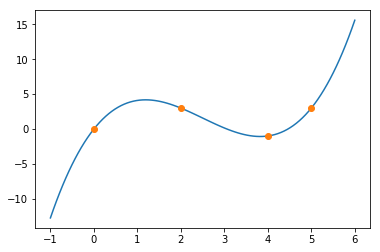

In [92]:
import matplotlib.pyplot as plt

xx=np.linspace(-1,6,100)
yy=P3(xx)
plt.plot(xx,yy,'-')
plt.plot(x,y,'o')
plt.show()

### Efeito de Runge


- Neste exemplo, ilustra-se o fenómeno de Runge, i.e., o problema de oscilação nos extremos de um intervalo que ocorre quando se consideram polinómios de ordem elevada sobre um conjunto de nós de interpolação igualmente espaçados.

- Considere-se a função de Runge:

$$\displaystyle f(x)=\frac{1}{1+(5x)^2}.$$

- Represente os gráficos de $f(x),\, x\in[-1,1]$ e dos polinómios de grau 5 e 10 que se colocam sobre a função em pontos igualmente espaçados e incluindo os extremos.

data=
 [[-1.         -0.6        -0.2         0.2         0.6         1.        ]
 [ 0.03846154  0.1         0.5         0.5         0.1         0.03846154]]
data=
 [[-1.         -0.8        -0.6        -0.4        -0.2         0.          0.2
   0.4         0.6         0.8         1.        ]
 [ 0.03846154  0.05882353  0.1         0.2         0.5         1.          0.5
   0.2         0.1         0.05882353  0.03846154]]
Dif. divid. 0 = 0.03846
Dif. divid. 1 = 0.15385
Dif. divid. 2 = 1.05769
Dif. divid. 3 = -1.92308
Dif. divid. 4 = 1.20192
Dif. divid. 5 = -0.00000
Dif. divid. 0 = 0.03846
Dif. divid. 1 = 0.10181
Dif. divid. 2 = 0.26018
Dif. divid. 3 = 0.79186
Dif. divid. 4 = 2.68665
Dif. divid. 5 = -6.36312
Dif. divid. 6 = -17.67534
Dif. divid. 7 = 84.84163
Dif. divid. 8 = -167.91572
Dif. divid. 9 = 220.94174
Dif. divid. 10 = -220.94174


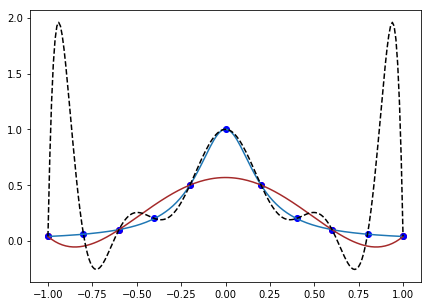

In [70]:
x_5=np.linspace(-1.0,1.0,6)
x_10=np.linspace(-1.0,1.0,11)

runge = lambda x: 1.0/(1.0+(5*x)**2)

y_5= runge(x_5)
y_10= runge(x_10)

P5=PNewton(x_5,y_5)
P10=PNewton(x_10,y_10)

xx=np.linspace(-1.0,1.0,200)
yP5=P5(xx)
yP10=P10(xx)
yy=runge(xx)
plt.figure(figsize=(7,5))
plt.plot(x_5,y_5,'o',color='r')
plt.plot(x_10,y_10,'o',color='b')
plt.plot(xx,yy,'-')
plt.plot(xx,yP5,'-',color='brown')
plt.plot(xx,yP10,'--',color='k')
plt.show()
plt.clf()

## O Erro de Interpolação

-  Sejam $x_0<\cdots<x_n$ os $n+1$ pontos associados à interpolação e seja $f\in C^{(n+1)}(I)$ com $I$ dado da forma seguinte

 -  $I=[x,x_n]$ se $x<x_0$;
 -  $I=[x_0,x_n]$ se $x\in[x_0,x_n]$;
 -  $I=[x_0,x]$ se $x>x_n$.

Então tem-se:
$$E(x)=(x-x_0)(x-x_1)\cdots(x-x_n)\frac{f^{(n+1)}(\xi_x)}{(n+1)!},\,\,
\xi_x \in I$$


Portanto sai a majoração natural do erro em $x$ dada por:
$$|E(x)|=|f(x)-P_n(x)|\leq |(x-x_0)\cdots(x-x_n)|\frac{M_{n+1}}{(n+1)!}$$
onde $\displaystyle M_{n+1}=\max_{x\in I} |f^{(n+1)}(x)|.$

## Exercícios

-  Considere  a tabela de valores $(x_i,y_i)$ $(i=1,\dots,6)$ onde
  $y_i=g(x_i)$ e   $g$ é um função real de variável real não conhecida:

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
x_i&0.2&0.3&0.6&0.9&1.1&1.3\\
\hline
y_i=g(x_i)&0.050446&0.098426&0.332770&0.726600&1.097200&1.569700\\
\hline
\end{array}
$$

 Utilize um polinómio interpolador de menor grau possível,
 recorrendo a 4 pontos da tabela, para aproximar o valor de $g(0.76)$.
 Escolha os pontos de interpolação de forma a minimizar o erro da aproximação.

- Considere a função $f$ dada pela tabela  seguinte:
$$
\begin{array}{|c|c|c|c|c|c|}
\hline
x&0.0&0.2&0.4&0.6&0.8\\
\hline
f(x)&1&0.808&0.664&0.616&0.712\\
\hline
\end{array}
$$

 -  Calcule um valor aproximado para $f(0.3)$ utilizando um polinómio
  interpolador de grau 2. Escolha os nós de interpolação da tabela
  de forma a minimizar o erro da aproximação.
 - Sabendo que $f$ é um polinómio de grau 3 da forma
  $f(x)=x^3+a_2x^2+a_1x+a_0$ $(a_i\in\mathbb{R}$ com $i=0,1,2)$ determine o
  erro da aproximação para $f(0.3)$ obtida na alínea anterior.



- Considere a função $h(t)$ dada pela tabela seguinte:
$$
\begin{array}{|c|c|c|c|c|}
\hline
t&0&0.25&0.5&0.75\\
\hline
h(t)&1.41421&2.08673&2.71743&3.26710\\
\hline
\end{array}
$$

 - Utilize um  polinómio interpolador de grau 2 para  obter uma aproximação do
  valor de $h(0.6)$. Escolha os nodos de interpolação de modo a
  minimizar o erro cometido.
 - Assuma que a função $h$ é definida por $\displaystyle
  h(t)=\sqrt{2}+\mathrm{e}
  \sin(t)$. Utilize a expressão para o erro de truncatura dos
  polinómios interpoladores de Lagrange para calcular um majorante do
  erro cometido na alínea a) e compare-o com o erro exacto.
